In [9]:
# Importing Libraries
import numpy as np
import pandas as pd
import os, gc
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
%matplotlib inline

import pylab 
import scipy.stats as stats

RANDOM_SEED = 1000
np.random.seed(RANDOM_SEED) 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [5]:
# Loading the dataset
# Performance data
train_perf_df = pd.read_csv('../data/trainperf.csv')
test_perf_df = pd.read_csv('../data/testperf.csv')

# Previous loans data
train_prev_df = pd.read_csv('../data/trainprevloans.csv')
test_prev_df = pd.read_csv('../data/testprevloans.csv')

# Demographic data
train_demo_df = pd.read_csv('../data/traindemographics.csv')
test_demo_df = pd.read_csv('../data/testdemographics.csv')
submission = pd.read_csv('../data/SampleSubmission.csv')

In [6]:
train_perf_df.shape, train_prev_df.shape, train_demo_df.shape, test_perf_df.shape, test_prev_df.shape, test_demo_df.shape

((4368, 10), (18183, 12), (4346, 9), (1450, 9), (5907, 12), (1487, 9))

In [7]:
# show the first five rows
train_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good


In [8]:
target_column = train_perf_df[['good_bad_flag']]
target = target_column.copy()
train_perf_df = train_perf_df.drop(['good_bad_flag'], axis=1)
train_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN


In [269]:
target.head()

,good_bad_flag
0,Good
1,Good
2,Good
3,Good
4,Good


In [270]:
# show the first five rows
train_prev_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [271]:
# show the first five rows
train_demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [272]:
# show the first five rows
test_perf_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,NaN


In [273]:
# show the first five rows
test_prev_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00.000000,2016-05-17 09:36:55.000000,10000.0,13000.0,30,2016-06-17 00:04:15.000000,NaN,2016-06-16 00:00:00.000000,2016-06-16 15:44:08.000000
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59.000000,2017-02-04 20:28:52.000000,30000.0,36800.0,60,2017-03-02 16:22:58.000000,NaN,2017-03-06 00:00:00.000000,2017-03-02 16:07:47.000000
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22.000000,2017-03-04 09:28:16.000000,30000.0,34400.0,30,2017-04-02 00:44:24.000000,NaN,2017-04-03 00:00:00.000000,2017-04-01 21:29:46.000000
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,2016-07-04 11:34:04.000000,NaN,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,2016-06-02 00:02:58.000000,NaN,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000


In [274]:
# show the first five rows
test_demo_df.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28 00:00:00.000000,Savings,5.296628,7.593965,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23 00:00:00.000000,Savings,3.294513,6.596602,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04 00:00:00.000000,Savings,8.501912,7.729364,First Bank,NaN,Permanent,NaN
3,8a858e9d5bfd7037015bfdab79f61305,1983-05-28 00:00:00.000000,Savings,3.318904,6.681595,UBA,NaN,Permanent,NaN
4,8a858fde56eb02280156eb6dafc128ac,1982-03-29 00:00:00.000000,Savings,6.354624,4.949031,First Bank,NaN,Self-Employed,NaN


In [275]:
# show the first five rows
submission.head()

,customerid,Good_Bad_flag
0,8a28afc7474813a40147639ec637156b,1
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1


In [276]:
train = pd.concat([train_perf_df, train_prev_df], axis=0, copy=True)
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,closeddate,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,NaN,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,NaN,NaN,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,NaN,NaN,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,NaN,NaN,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,NaN,NaN,NaN


In [277]:
train = pd.merge(train, train_demo_df, on='customerid')
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,NaN,NaN,NaN,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,NaN,2016-09-01 16:06:48.000000,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,NaN,2017-05-28 14:44:49.000000,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
3,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,NaN,2017-04-26 22:18:56.000000,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate
4,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,NaN,2017-06-25 15:24:06.000000,2017-07-03 00:00:00.000000,2017-06-25 15:13:56.000000,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,NaN,Permanent,Post-Graduate


In [278]:
test = pd.concat([test_perf_df, test_prev_df], axis=0, copy=True)
test.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,closeddate,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000.0,12250.0,30,NaN,NaN,NaN,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000.0,44000.0,30,NaN,NaN,NaN,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000.0,24500.0,30,NaN,NaN,NaN,NaN
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000.0,34500.0,30,NaN,NaN,NaN,NaN
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000.0,24500.0,30,NaN,NaN,NaN,NaN


In [279]:
test = pd.merge(test, test_demo_df, on='customerid')
test.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,closeddate,firstduedate,firstrepaiddate,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000.0,24500.0,30,NaN,NaN,NaN,NaN,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
1,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,NaN,2016-07-04 11:34:04.000000,2016-07-04 00:00:00.000000,2016-07-04 11:19:01.000000,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,NaN,2016-06-02 00:02:58.000000,2016-05-31 00:00:00.000000,2016-06-01 15:22:34.000000,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301803054,4,2017-01-26 16:34:08.000000,2017-01-26 15:34:01.000000,20000.0,23800.0,30,NaN,2017-03-20 20:49:12.000000,2017-02-27 00:00:00.000000,2017-03-20 20:34:02.000000,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301943779,5,2017-06-19 15:20:57.000000,2017-06-19 14:19:48.000000,15000.0,18375.0,30,NaN,2017-07-17 13:13:01.000000,2017-07-19 00:00:00.000000,2017-07-17 13:02:52.000000,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,NaN,Permanent,NaN


## Exploratory Data Analysis (EDA)

In [280]:
# show data information
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16970 entries, 0 to 16969
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  16970 non-null  object 
 1   systemloanid                16970 non-null  int64  
 2   loannumber                  16970 non-null  int64  
 3   approveddate                16970 non-null  object 
 4   creationdate                16970 non-null  object 
 5   loanamount                  16970 non-null  float64
 6   totaldue                    16970 non-null  float64
 7   termdays                    16970 non-null  int64  
 8   referredby                  1252 non-null   object 
 9   closeddate                  13693 non-null  object 
 10  firstduedate                13693 non-null  object 
 11  firstrepaiddate             13693 non-null  object 
 12  birthdate                   16970 non-null  object 
 13  bank_account_type           169

In [281]:
# show data information
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  1990 non-null   object 
 1   systemloanid                1990 non-null   int64  
 2   loannumber                  1990 non-null   int64  
 3   approveddate                1990 non-null   object 
 4   creationdate                1990 non-null   object 
 5   loanamount                  1990 non-null   float64
 6   totaldue                    1990 non-null   float64
 7   termdays                    1990 non-null   int64  
 8   referredby                  137 non-null    object 
 9   closeddate                  1605 non-null   object 
 10  firstduedate                1605 non-null   object 
 11  firstrepaiddate             1605 non-null   object 
 12  birthdate                   1990 non-null   object 
 13  bank_account_type           1990 

In [282]:
# function to check for columns with null values
def checkForNull(df):
    colList=df.columns
    for col in colList:
        nullCount=pd.isnull(df[col]).sum()
        if(nullCount!=0):
            print("{}-->{}".format(col,nullCount))

In [283]:
checkForNull(train)

referredby-->15718
closeddate-->3277
firstduedate-->3277
firstrepaiddate-->3277
bank_branch_clients-->16833
employment_status_clients-->1856
level_of_education_clients-->13063


In [284]:
checkForNull(test)

referredby-->1853
closeddate-->385
firstduedate-->385
firstrepaiddate-->385
bank_branch_clients-->1968
employment_status_clients-->199
level_of_education_clients-->1558


In [285]:
train = train.drop(['referredby','closeddate','firstduedate','firstrepaiddate','bank_branch_clients'], axis = 1)
test = test.drop(['referredby','closeddate','firstduedate','firstrepaiddate','bank_branch_clients'], axis = 1)

In [286]:
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
3,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
4,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,1972-01-15 00:00:00.000000,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate


In [287]:
test.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000.0,24500.0,30,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,Permanent,NaN
1,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,Permanent,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301803054,4,2017-01-26 16:34:08.000000,2017-01-26 15:34:01.000000,20000.0,23800.0,30,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,Permanent,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301943779,5,2017-06-19 15:20:57.000000,2017-06-19 14:19:48.000000,15000.0,18375.0,30,1981-09-05 00:00:00.000000,Savings,3.227945,6.586668,UBA,Permanent,NaN


In [288]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(True, False)

In [289]:
# Cleaning for duplicates
train.drop_duplicates(inplace = True), test.drop_duplicates(inplace = True)

(None, None)

In [290]:
# Check again for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

In [291]:
train.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1.694200e+04,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000,16942.000000
mean,3.018666e+08,4.392811,16814.602762,19966.356528,27.228781,4.489027,7.290077
std,1.006816e+05,3.372990,9668.853525,10819.879151,11.117245,8.510960,3.405481
min,3.016001e+08,1.000000,3000.000000,3900.000000,15.000000,-118.247009,-33.868818
25%,3.017985e+08,2.000000,10000.000000,12250.000000,15.000000,3.354724,6.472105
50%,3.018884e+08,3.000000,10000.000000,13000.000000,30.000000,3.576022,6.618660
75%,3.019492e+08,6.000000,20000.000000,24500.000000,30.000000,6.364658,7.422043
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [292]:
test.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1.990000e+03,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000,1990.000000
mean,3.018660e+08,4.354271,16307.035176,19382.826633,26.683417,3.826168,7.382951
std,1.014630e+05,3.319825,9214.209672,10204.864356,9.600113,9.148267,5.155020
min,3.016035e+08,1.000000,2000.000000,2600.000000,15.000000,-97.883895,-74.005974
25%,3.018001e+08,2.000000,10000.000000,13000.000000,15.000000,3.355934,6.482523
50%,3.018880e+08,3.000000,10000.000000,13000.000000,30.000000,3.646452,6.650823
75%,3.019479e+08,6.000000,20000.000000,24500.000000,30.000000,6.573713,7.481003
max,3.020040e+08,19.000000,50000.000000,57500.000000,90.000000,11.325827,40.665105


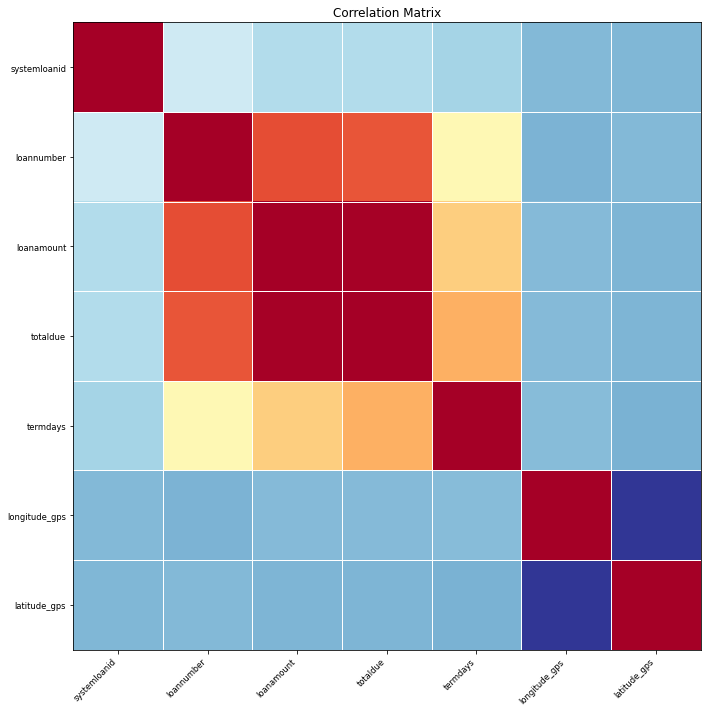

In [293]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111);
plot_corr(train.corr(), xnames = train.corr().columns, ax = ax);

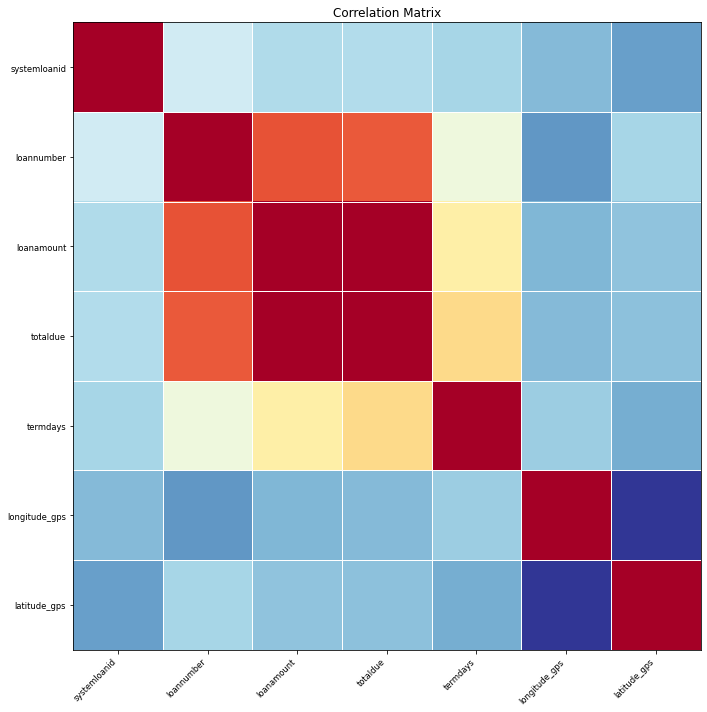

In [294]:
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(10,10));
ax = fig.add_subplot(111);
plot_corr(test.corr(), xnames = test.corr().columns, ax = ax);

### Extract Year from birthdate since the specific date of birth is not significant to our demographics analysis

In [295]:
train.birthdate = train.birthdate.apply(lambda x: int(x.split(' ')[0].split('-')[0]))
train.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,1972,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
1,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,1972,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
2,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,1972,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
3,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,1972,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate
4,8a2a81a74ce8c05d014cfb32a0da1049,301923941,10,2017-06-01 13:34:30.000000,2017-06-01 12:34:21.000000,20000.0,24500.0,30,1972,Other,3.43201,6.433055,Diamond Bank,Permanent,Post-Graduate


In [296]:
test.birthdate = test.birthdate.apply(lambda x: int(x.split(' ')[0].split('-')[0]))
test.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000.0,24500.0,30,1981,Savings,3.227945,6.586668,UBA,Permanent,NaN
1,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14.000000,2016-06-02 13:27:08.000000,10000.0,13000.0,30,1981,Savings,3.227945,6.586668,UBA,Permanent,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12.000000,2016-05-16 08:13:04.000000,10000.0,11500.0,15,1981,Savings,3.227945,6.586668,UBA,Permanent,NaN
3,8a8589c253ace09b0153af6ba58f1f31,301803054,4,2017-01-26 16:34:08.000000,2017-01-26 15:34:01.000000,20000.0,23800.0,30,1981,Savings,3.227945,6.586668,UBA,Permanent,NaN
4,8a8589c253ace09b0153af6ba58f1f31,301943779,5,2017-06-19 15:20:57.000000,2017-06-19 14:19:48.000000,15000.0,18375.0,30,1981,Savings,3.227945,6.586668,UBA,Permanent,NaN


### We will encode categorical values with numberical ones on bank_account_type

In [297]:
train.bank_account_type.value_counts()

Savings    10861
Other       5881
Current      200
Name: bank_account_type, dtype: int64

In [298]:
test.bank_account_type.value_counts()

Savings    1317
Other       653
Current      20
Name: bank_account_type, dtype: int64

### Data Visualisations

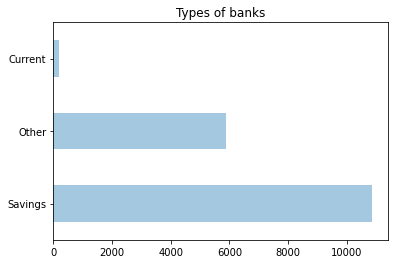

In [299]:
train.bank_account_type.value_counts().plot(kind='barh', title='Types of banks', alpha=0.4)
plt.show()

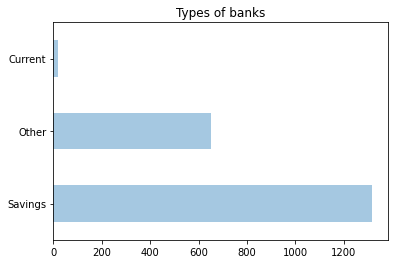

In [300]:
test.bank_account_type.value_counts().plot(kind='barh', title='Types of banks', alpha=0.4)
plt.show()

### How many people have a savings account and are permanent?

In [301]:
use_savings_permanent = train[(train.bank_account_type == 'Savings') & (train.employment_status_clients == 'Permanent')].customerid.unique()
'The number of permanently employed people with a savings account is ' + str(len(use_savings_permanent))

'The number of permanently employed people with a savings account is 1898'

In [302]:
use_savings_self_employed = train[(train.bank_account_type == 'Savings') & (train.employment_status_clients == 'Self-Employed')].customerid.unique()
'The number of self employed people with a savings account is ' + str(len(use_savings_self_employed))

'The number of self employed people with a savings account is 88'

In [303]:
# Percentage of people that have a savings account and are permanent
percent_employed_saving = (len(use_savings_permanent) / train.shape[0]) * 100

# Percentage of people that have a savings account and are self-employed
percent_self_employed_saving = (len(use_savings_self_employed) / train.shape[0]) * 100

print('Permanently employed with Savings Account ' + str(round(percent_employed_saving, 2)) + '%')
print('Self employed with Savings Account ' + str(round(percent_self_employed_saving, 2)) + '%')

Permanently employed with Savings Account 11.2%
Self employed with Savings Account 0.52%


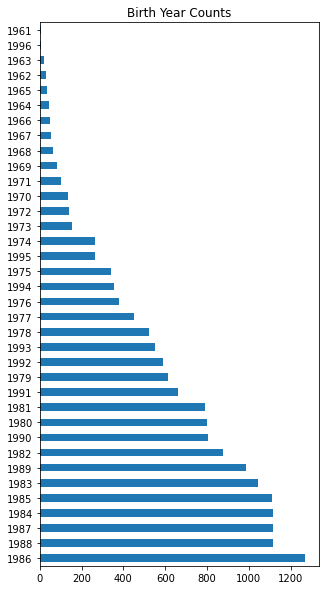

In [304]:
train.birthdate.value_counts().plot(kind='barh', title='Birth Year Counts', figsize=(5,10), orientation='horizontal')
plt.show()

In [305]:
train.birthdate.describe()

count    16942.000000
mean      1984.132216
std          6.126222
min       1961.000000
25%       1980.000000
50%       1985.000000
75%       1988.000000
max       1996.000000
Name: birthdate, dtype: float64

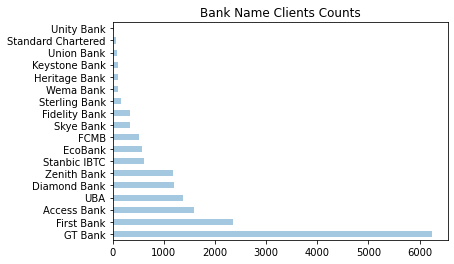

In [306]:
train.bank_name_clients.value_counts().plot(kind='barh', title='Bank Name Clients Counts', alpha=0.4)
plt.show()

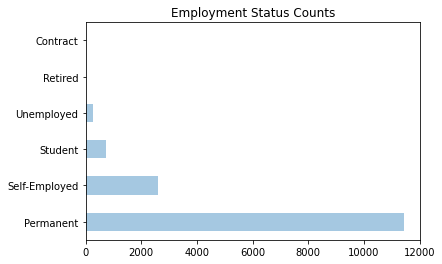

In [307]:
train.employment_status_clients.value_counts().plot(kind='barh', title='Employment Status Counts', alpha=0.4)
plt.show()

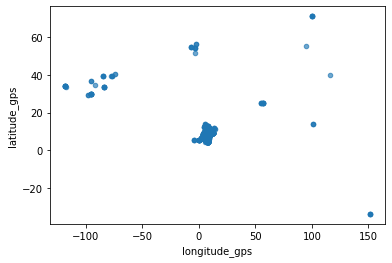

In [308]:
train.plot(kind="scatter", x="longitude_gps", y="latitude_gps", alpha=0.4)
plt.show()

In [309]:
train = train.drop(['customerid','systemloanid','approveddate','creationdate'], axis = 1)
test = test.drop(['customerid','systemloanid','approveddate','creationdate'], axis = 1)

## Categorical Variable Encoding

In [310]:
# Function that takes and dataframe and categorical feature name to be encoded and returns encoded dataframe
def feat_encode(df, col_name):
    # Get unique categories from column
    keys = list(df[col_name].unique())
    # Get index for each unique category to be encoded value
    values = [val for val in range(len(keys))]
    # Create dictionary of the above keys and values
    encode_dict = dict(zip(keys,values))
    # Alter dataframe entries by swapping each category name with values
    df[col_name] = df[col_name].apply(lambda x: encode_dict[x])
    # Return altered dataframe
    return df

In [311]:
# Encode good_bad_flag to numerical Values
target = feat_encode(target, 'good_bad_flag')
target.head()

,good_bad_flag
0,0
1,0
2,0
3,0
4,0


In [312]:
# Encode all categorical data from dataset
train = feat_encode(train,'employment_status_clients')
train = feat_encode(train,'bank_name_clients')
train = feat_encode(train,'bank_account_type')
train = feat_encode(train,'level_of_education_clients')
train.head()

,loannumber,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,12,30000.0,34500.0,30,1972,0,3.43201,6.433055,0,0,0
1,2,10000.0,13000.0,30,1972,0,3.43201,6.433055,0,0,0
2,9,10000.0,13000.0,30,1972,0,3.43201,6.433055,0,0,0
3,8,20000.0,23800.0,30,1972,0,3.43201,6.433055,0,0,0
4,10,20000.0,24500.0,30,1972,0,3.43201,6.433055,0,0,0


In [313]:
# Encode all categorical data from dataset
test = feat_encode(test,'employment_status_clients')
test = feat_encode(test,'bank_name_clients')
test = feat_encode(test,'bank_account_type')
test = feat_encode(test,'level_of_education_clients')
test.head()

,loannumber,loanamount,totaldue,termdays,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients
0,6,20000.0,24500.0,30,1981,0,3.227945,6.586668,0,0,0
1,3,10000.0,13000.0,30,1981,0,3.227945,6.586668,0,0,0
2,2,10000.0,11500.0,15,1981,0,3.227945,6.586668,0,0,0
3,4,20000.0,23800.0,30,1981,0,3.227945,6.586668,0,0,0
4,5,15000.0,18375.0,30,1981,0,3.227945,6.586668,0,0,0


## Training

In [317]:
# Split the data into features and labels
y = target['good_bad_flag']
X = train

In [318]:
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.2, random_state=1000)

print("Size of training: Features: {0},  Target: {1}".format(X_train.shape, y_train.shape))
print("Size of test: Features: {0},  Target: {1}".format(X_test.shape, y_test.shape))

ValueError: Found input variables with inconsistent numbers of samples: [16942, 4368]

### Develop predictive models

In [65]:
# Defining MAPE(Mean Absolute Percentage Error) function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted) / Y_actual))*100
    return mape

### Model selection

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [67]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators = 42, criterion = 'entropy')))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('LGBM', LGBMClassifier()))

In [68]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(MAPE(y_test, y_pred))
    names.append(name)

results = pd.DataFrame({'Model': names, 'MAPE': scores})
results

,Model,MAPE
0,LR,inf
1,KNN,inf
2,DT,inf
3,RF,inf
4,GB,inf
5,GNB,inf
6,XGB,inf
7,LGBM,inf


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


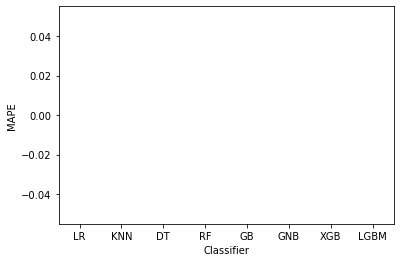

In [69]:
axis = sns.barplot(x ='Model', y ='MAPE', data = results)
axis.set(xlabel='Classifier', ylabel='MAPE')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.0005, '{:1.3f}'.format(height), ha="center") 
    
plt.show()

In [70]:
from sklearn.ensemble import VotingClassifier

knn_clf =KNeighborsClassifier()
gnb_clf = GaussianNB()
lgbm_clf = LGBMClassifier()
DT = DecisionTreeClassifier()

voting_clf = VotingClassifier(
    estimators=[('lr', knn_clf), ('rf', gnb_clf), ('lgbm', lgbm_clf), ('dt', DT)],
    voting='hard')

In [71]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
Mape = MAPE(y_test, y_pred)
Mape

inf

In [72]:
scaledTest = scaler.fit_transform(test)

In [73]:
predictions = pd.DataFrame(voting_clf.predict(scaledTest),columns= ['good_bad_flag'])

In [74]:
predictions = pd.concat([submission["customerid"], predictions], axis =1)

In [75]:
predictions.to_csv('../Results/Voting.csv', index=False)
predictions.head()

,customerid,good_bad_flag
0,8a28afc7474813a40147639ec637156b,0
1,8a3735d5518aba7301518ac34413010d,1
2,8a76e7d443e6e97c0143ed099d102b1d,1
3,8a818823525dceef01525deda2480384,1
4,8a818926522ea5ef01523aff15c37482,1
